In [ ]:
!pip install nussl

In [2]:
import nussl
import matplotlib.pyplot as plt
import time
import warnings


    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


In [3]:
import os
import requests
from google_drive_downloader import GoogleDriveDownloader as gdd

def download_file_from_google_drive(file_id, dest_path):
    gdd.download_file_from_google_drive(file_id=file_id, dest_path=dest_path)

# Replace 'file_id' and 'dest_path' with the actual file ID and destination path, respectively
file_id = '1Oo3e5HyQs3TAFiBPsjoASeoNC7gpll9Y'
dest_path = '/content/sample_data/audio_example_mono.mp3'

# Download the file from Google Drive
download_file_from_google_drive(file_id, dest_path)

In [ ]:
!pip install spleeter
!pip install librosa==0.8.
!pip show librosa

In [ ]:
# Import the required libraries
import librosa
from spleeter.separator import Separator
import soundfile as sf
import os

# Load the mixed audio file
# audio, sr = librosa.load('/content/audio_example_mono.mp3', sr=44100)
audio, sr = librosa.load('/content/sample_data/audio_example_mono.mp3', sr=44100)

if len(audio.shape) == 1:
    audio = audio.reshape(-1, 1)

# Create a Spleeter separator object
separator = Separator('spleeter:2stems')

# Separate the audio into vocals and accompaniment
separated_audio = separator.separate(audio)

# Get the vocals and accompaniment tracks
vocals = separated_audio['vocals']
accompaniment = separated_audio['accompaniment']

# Save the separated tracks to individual files

# sf.write('/content/stereo_file1.wav', vocals, 48000, 'PCM_24')
# sf.write('/content/stereo_file2.wav', accompaniment, 48000, 'PCM_24')
# os.mkdir('/content/spleeter_output')
if not os.path.exists('/content/spleeter_output'):
    os.mkdir('/content/spleeter_output')
sf.write('/content/spleeter_output/stereo_file1.wav', vocals, 48000, 'PCM_24')
sf.write('/content/spleeter_output/stereo_file2.wav', accompaniment, 48000, 'PCM_24')
#librosa.output.write_wav('/content/separated_spleeter/vocals.wav', vocals, sr)
#librosa.output.write_wav('/content/separated_spleeter/accompaniment.wav', accompaniment, sr)

In [ ]:
pip install --upgrade librosa

In [8]:
import os
import matplotlib.pyplot as plt
import nussl

def visualize_and_embed(audio_dir, y_axis='mel'):
    sources = {}
    for i, file_name in enumerate(os.listdir(audio_dir)):
        file_path = os.path.join(audio_dir, file_name)
        audio_signal = nussl.AudioSignal(file_path)
        sources[f'Source {i+1}'] = audio_signal
        
    plt.figure(figsize=(10, 4))
    plt.subplot(111)
    nussl.utils.visualize_sources_as_masks(
        sources, db_cutoff=-60, y_axis=y_axis)
    plt.tight_layout()
    plt.show()
    
    for source_name, audio_signal in sources.items():
        audio_signal.write_audio_to_file(f'{source_name}.wav')
    nussl.play_utils.multitrack(sources, ext='.wav')

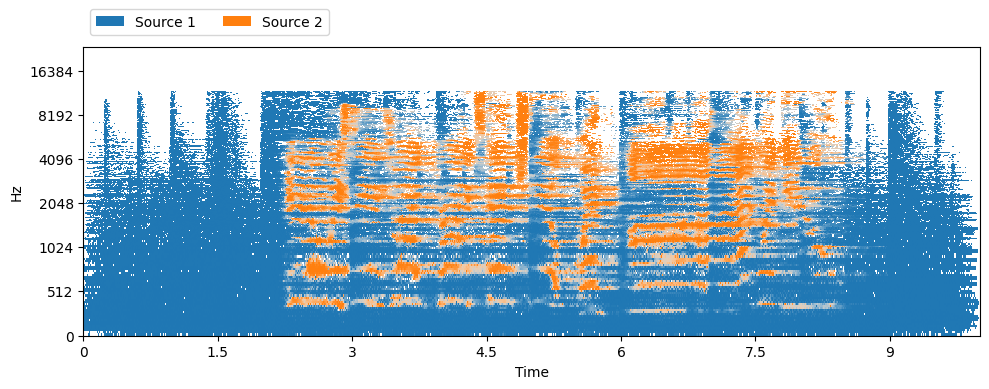


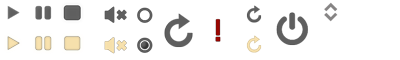
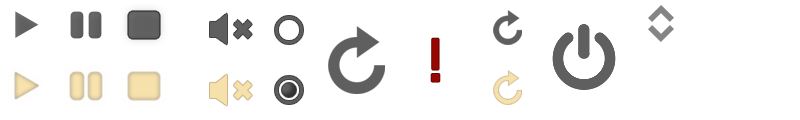
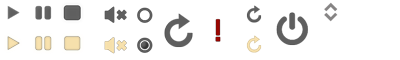

In [9]:
visualize_and_embed('/content/spleeter_output')

In [10]:
import numpy as np
import soundfile as sf
import librosa
from sklearn.decomposition import FastICA

# Load the audio data
# audio_file = '/content/audio_example_mono.mp3'
audio_file = '/content/sample_data/audio_example_mono.mp3'
audio_data, sr = sf.read(audio_file)

# Convert stereo to mono if necessary
if len(audio_data.shape) > 1:
    audio_data = np.mean(audio_data, axis=1)

# Compute the short-time Fourier transform (STFT) of the audio data
n_fft = 2048
hop_length = 512
stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)

# Compute the power spectrogram
power = np.abs(stft)**2

# Perform Independent Component Analysis (ICA) on the power spectrogram
ica = FastICA(n_components=2)
ica_result = ica.fit_transform(power.T)

# Compute the UniMix masks
mask1 = ica_result[:, 0] / (ica_result[:, 0] + ica_result[:, 1])
mask2 = ica_result[:, 1] / (ica_result[:, 0] + ica_result[:, 1])

# Apply the masks to the power spectrogram
power1 = (mask1.T * power).T
power2 = (mask2.T * power).T

# Apply the masks to the power spectrogram
#power1 = mask1.reshape((-1, 1)) * power
#power2 = mask2.reshape((-1, 1)) * power

# Reconstruct the audio signals using inverse STFT
audio1 = librosa.istft(np.sqrt(power1.T) * np.exp(1j*np.angle(stft)), hop_length=hop_length)
audio2 = librosa.istft(np.sqrt(power2.T) * np.exp(1j*np.angle(stft)), hop_length=hop_length)

if not os.path.exists('/content/FastICA'):
    os.mkdir('/content/FastICA')

# Save the separated audio signals
sf.write('/content/FastICA/audio1.wav', audio1, sr)
sf.write('/content/FastICA/audio2.wav', audio2, sr)


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
<ipython-input-10-5d064e9b0e0a>:40: RuntimeWarning: invalid value encountered in sqrt
  audio1 = librosa.istft(np.sqrt(power1.T) * np.exp(1j*np.angle(stft)), hop_length=hop_length)
<ipython-input-10-5d064e9b0e0a>:41: RuntimeWarning: invalid value encountered in sqrt
  audio2 = librosa.istft(np.sqrt(power2.T) * np.exp(1j*np.angle(stft)), hop_length=hop_length)


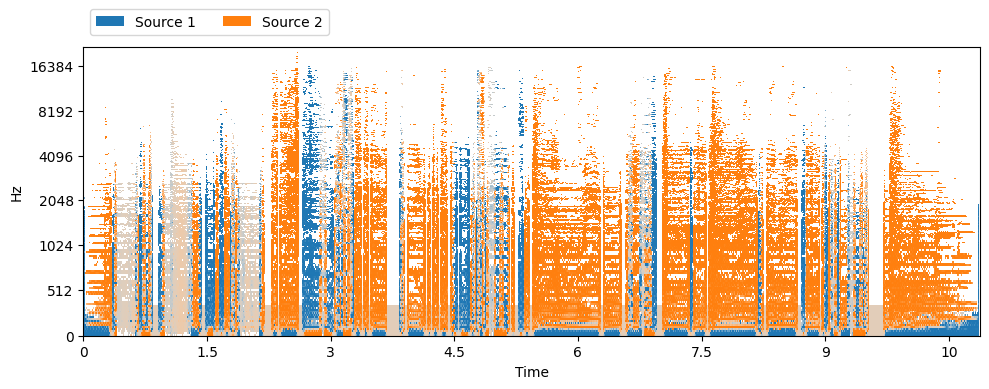


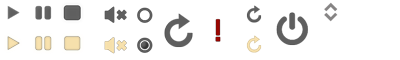
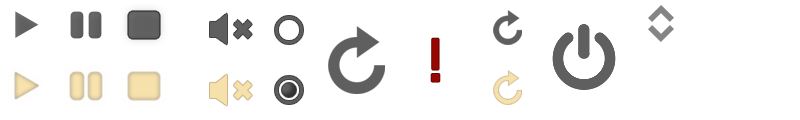
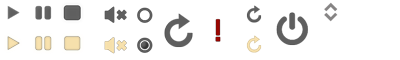

In [11]:
visualize_and_embed('/content/FastICA')